Regression Tree

예측값 $\hat{y}$을 다음처럼 각 특징값 영역마다 고정된 값 $y_1, y_2$를 사용하고,

$$ 
\hat{y} = 
\begin{cases} 
y_1 & \text{ if } x \geq x_{\text{threshold}} \\ 
y_2 & \text{ if } x < x_{\text{threshold}}
\end{cases} $$

기준값 및 $y_1, y_2$를 선택하는 목적함수로 오차 제곱합을 사용하면 회귀분석를 할 수 있다. 이러한 모형을 회귀 나무(regression tree)라고 한다.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [19]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [20]:
#DecisionTreeRegressor()
# criterion : 불순성의 기준을 뭐로 할지 'gini'(defalut) / 'entropy'
# 다음의 parameterm 들으 overfitting 을 해결해준다.
# max_depth : 트리의 최대 깊이. 
#           : (defalut) full tree 가 될때까지 확장.
#           : 이를 이용해 사전 가지치기를 하고/ overfitting 을 해결할 수 있다.
# min_samples_split : 노드에서 가지 분리할 떄 필요한 최소 sample 갯수에 제한을 준다.
#                   : (default) = 2 
# min_samples_leaf : leaf 에서 가져야 할 최소 sample 
#                  : (default) = 1
# max_features : Decision tree 를 만들때 사용할 수 있는 변수의 갯수 제한
#              : (default) = 총 변수 갯수 사용

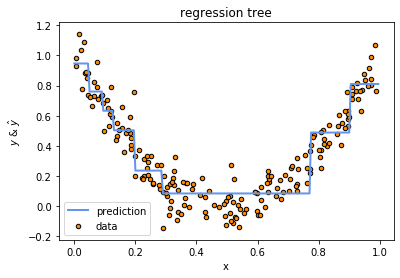

In [37]:
model = DecisionTreeRegressor( max_depth=3)
model.fit(X, y)

X_test = np.arange(0.0, 1, 0.005)[:, np.newaxis]
y_hat = model.predict(X_test)

# Plot the results
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_hat, color="cornflowerblue", linewidth=2, label="prediction")
plt.xlabel("x")
plt.ylabel(r"$y$ & $\hat{y}$")
plt.title("regression tree")
plt.legend();

그냥 하면 과적합이다. 하지만 min_samples_leaf=10 ,  max_depth = 3 등의 parameter 조정을 통해 과적합을 어느정도 줄일 수 있다.